In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Análise de componentes principais

In [20]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist.data
y = mnist.target

In [21]:
X_train = X[:60000].astype('float64')
y_train = y[:60000]

X_test = X[60000:].astype('float64')
y_test = y[60000:]

imagem media

In [22]:
X_train.shape

(60000, 784)

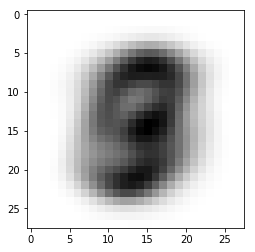

In [23]:
x0 = X_train.mean(axis=0)
plt.imshow(x0.reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Removendo a média

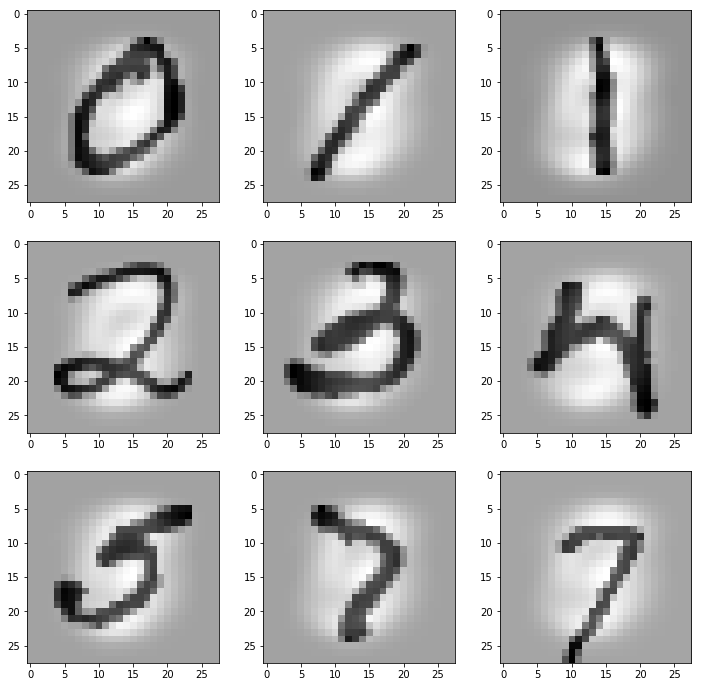

In [24]:
X_train_residual = X_train.copy()
for i in range(X_train_residual.shape[0]):
    X_train_residual[i,:] -= x0

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_residual[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Usando SVD para obter as componentes principais:

In [25]:
X_train_residual.shape

(60000, 784)

In [26]:
U, s, Vt = np.linalg.svd(X_train_residual[::10, :])

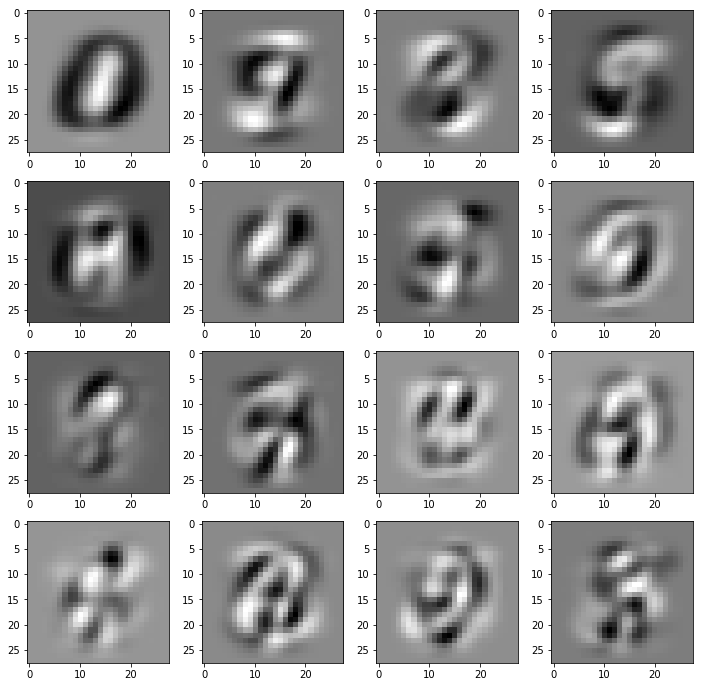

In [27]:
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    aux = Vt[i,:]/max(Vt[i,:])
    plt.imshow(aux.reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

In [28]:
s.shape

(784,)

In [29]:
v = Vt[0,:]
v.dot(v)

0.9999999999999994

Removendo a média e a primeira componente:

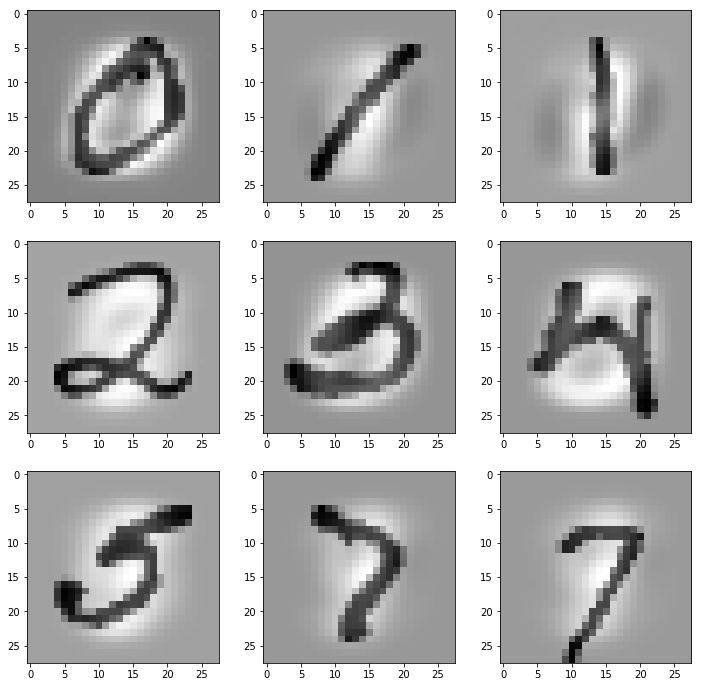

In [30]:
v0 = Vt[0, :]

X_train_residual = X_train.copy()

for i in range(X_train_residual.shape[0]):
    X_train_residual[i, :] -= x0
    X_train_residual[i, :] -= X_train_residual[i, :].dot(v0)*v0
    
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_residual[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Removendo a média, a primeira componente, e a segunda componente:

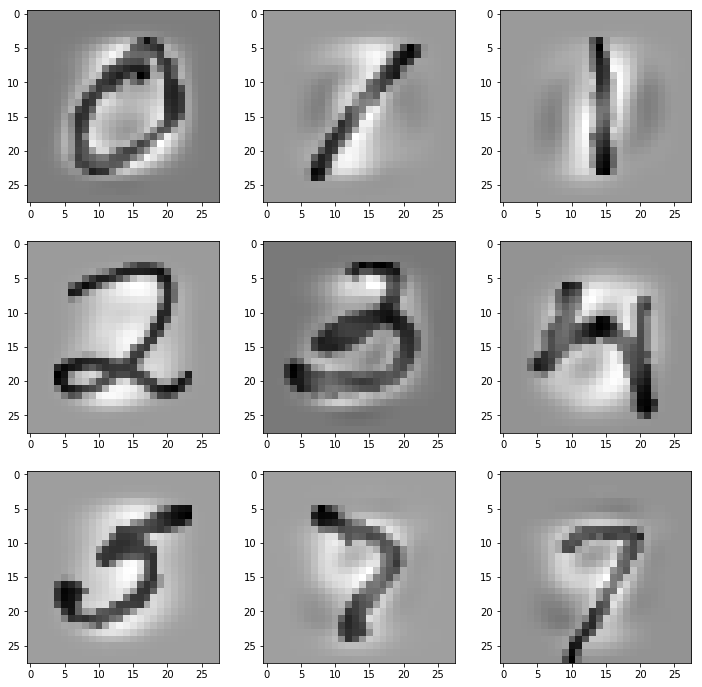

In [31]:
v1 = Vt[1, :]

X_train_residual = X_train.copy()

for i in range(X_train_residual.shape[0]):
    X_train_residual[i, :] -= x0
    X_train_residual[i, :] -= X_train_residual[i, :].dot(v0)*v0
    X_train_residual[i, :] -= X_train_residual[i, :].dot(v1)*v1
    
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_residual[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

Removendo a média e as 150 primeiras componentes (pode demorar alguns minutos):

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


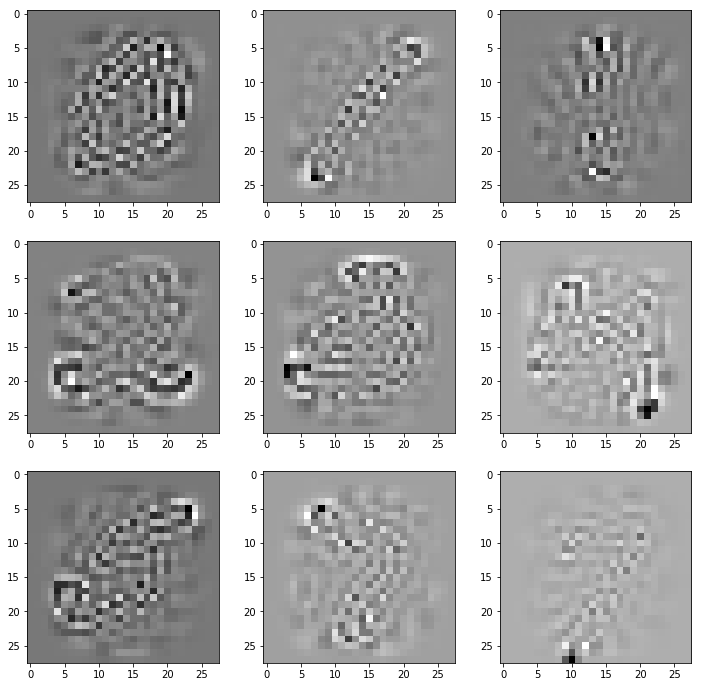

In [32]:
%time
X_train_residual = X_train.copy()
num_components = 150

for i in range(X_train_residual.shape[0]):
    X_train_residual[i, :] -= x0
    for j in range(num_components):
        v = Vt[j, :]
        X_train_residual[i, :] -= X_train_residual[i, :].dot(v)*v
    
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_residual[6000*i, :].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

**Atividade**

Exercício 9 do livro texto

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

X_train, y_train = mnist.data[:60000], mnist.target[:60000]

original_pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=RANDOM_SEED))
])

%time
original_pipeline.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [34]:
from sklearn.metrics import accuracy_score

y_ori_pred = original_pipeline.predict(X_test)
accuracy_score(y_ori_pred, y_test)

0.9455

In [35]:
from sklearn.decomposition import PCA

pca_pipe = Pipeline([
    ('pca', PCA(n_components=784)),
    ('clf', RandomForestClassifier(random_state=RANDOM_SEED))
])

%time
pca_pipe.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=784, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
          ...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [36]:
y_pca_pred = pca_pipe.predict(X_test)
accuracy_score(y_pca_pred, y_test)

0.8199